In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import lightkurve as lk

In [2]:
def background_flux_plot(lc, transit_time):
    try:
        lc = lc.normalize()
    except:
        lc = lc.stitch()
    
    fig, ax = plt.subplots(figsize = (8,4))

    ax.axvline(transit_time, color = "orange", zorder = -1)
    lc.plot(ax = ax, linewidth = 0, marker = ".", color = "limegreen", alpha = 0.3)
    lc.bin(20/24/60).plot(ax = ax, linewidth = 0, marker = ".", ms = 2, color = "darkslategrey", alpha = 1)
    
    # generate a mask so that we only see the times around the transit event
    transit_mask = (lc.time.value > transit_time - 0.5) & (lc.time.value < transit_time + 0.5)
    
    # make a plot with two panels so that we can see the lightcurve and the backgroudn flux next to one another
    fig, ax = plt.subplots(2,1, sharex = True)
    
    ax[0].plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = "darkslategrey", lw = 0, marker = ".", ms = 2)
    ax[1].plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = "blue", lw = 0, marker = ".", ms = 2)

    #plot a line at the time of the transit event
    ax[0].axvline(transit_time, color = "orange", zorder = -1)
    ax[1].axvline(transit_time, color = "orange", zorder = -1)
    
    ax[0].set_ylabel("Flux")
    ax[1].set_ylabel("Background flux")
    ax[1].set_xlabel("Time (TJD)")

    plt.show()

In [6]:
sector_data = lk.search_lightcurve("TIC 50309953", author = "SPOC", sector = 13)[0]
try:
    lc = sector_data.download_all()
except:
    lc = sector_data.download()

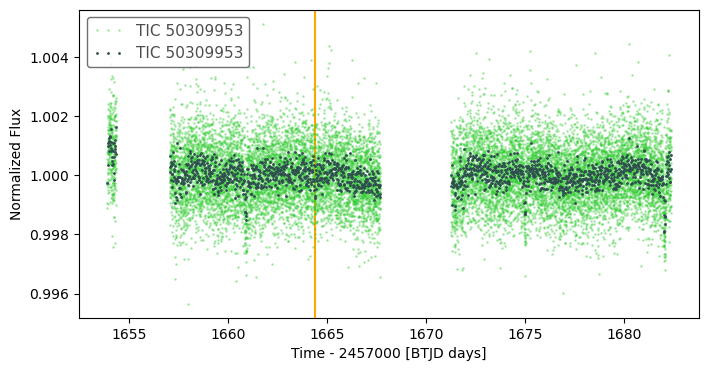

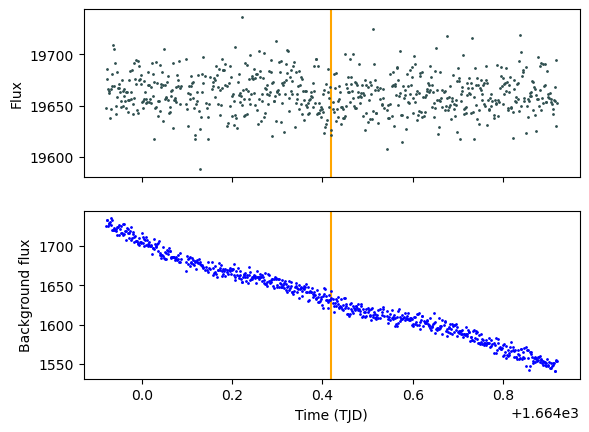

In [9]:
background_flux_plot(lc = lc, transit_time = 1660.899932 + 3.52)